In [ ]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns



In [37]:
data = pd.read_csv('/Users/joshoommen/Downloads/International Astronaut Database.csv')
data


,Name,Country,Gender,Flights,Total Flights,Total Flight Time (ddd:hh:mm)
0,Abdul Ahad Mohmand,Afghanistan,Man,Soyuz TM-6 (1988),1,008:20:26
1,Akihiko Hoshide,Japan,Man,"STS-124 (2008), Soyuz TMA-05M (2012), SpaceX C...",3,1751:22:25
2,Alan Bean,United States,Man,"Apollo 12 (1969), Skylab 3 (1973)",2,069:15:45
3,Alan G. Poindexter,United States,Man,"STS-122 (2008), STS-131 (2010)",2,027:21:09
4,Alan Shepard,United States,Man,"Mercury-Redstone 3 (1961), Apollo 14 (1971)",2,009:00:17
...,...,...,...,...,...,...
565,Yuri Romanenko,Soviet Union,Man,"Soyuz 26 (1977), Soyuz 38 (1980), Soyuz TM-2 (...",3,430:18:21
566,Yuri Shargin,Russia,Man,Soyuz TMA-5 (2004),1,009:21:29
567,Yury Usachov,Russia,Man,"Soyuz TM-18 (1994), Soyuz TM-23 (1996), STS-10...",4,552:22:24
568,Zhai Zhigang,China,Man,Shenzhou 7 (2008),1,002:20:26


In [42]:
astro = pd.read_csv('/Users/joshoommen/Downloads/astronauts.csv')
astro

,Profile.Astronaut Numbers.Overall,Profile.Astronaut Numbers.Nationwide,Profile.Name,Profile.Gender,Profile.Birth Year,Profile.Nationality,Profile.Military,Profile.Selection.Group,Profile.Selection.Year,Profile.Lifetime Statistics.Mission count,Mission.Role,Mission.Year,Mission.Name,Mission.Vechicles.Ascent,Mission.Vechicles.Orbit,Mission.Vechicles.Decent,Mission.Durations.Mission duration,Profile.Lifetime Statistics.Mission duration,Mission.Durations.EVA duration,Profile.Lifetime Statistics.EVA duration
0,1,1,"Gagarin, Yuri",male,1934,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 1,Vostok 1,Vostok 2,Vostok 3,1.77,1.77,0.00,0.00
1,2,2,"Titov, Gherman",male,1935,U.S.S.R/Russia,True,TsPK-1,1960,1,pilot,1961,Vostok 2,Vostok 2,Vostok 2,Vostok 2,25.00,25.30,0.00,0.00
2,3,1,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 1,1959,2,pilot,1962,MA-6,MA-6,MA-6,MA-6,5.00,218.00,0.00,0.00
3,3,1,"Glenn, John H., Jr.",male,1921,U.S.,True,NASA Astronaut Group 2,1959,2,PSP,1998,STS-95,STS-95,STS-95,STS-95,213.00,218.00,0.00,0.00
4,4,2,"Carpenter, M. Scott",male,1925,U.S.,True,NASA- 1,1959,1,Pilot,1962,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,Mercury-Atlas 7,5.00,5.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,561,345,"McClain, Anne Charlotte",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2018,57,Soyuz MS-11,ISS,Soyuz MS-11,4887.00,4887.00,13.13,13.13
1266,562,346,"Koch, Christina",female,1979,U.S.,True,NASA-21,2013,1,flight engineer,2019,59,Soyuz MS-12,ISS,not completed yet,7372.30,7372.30,27.80,27.80
1267,563,347,"Morgan, Andrew",male,1976,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,Soyuz MS-13,ISS,not completed yet,4303.08,4303.08,39.52,39.52
1268,564,348,"Meir, Jessica",female,1977,U.S.,True,NASA-21,2013,1,flight engineer,2019,60,Soyuz MS-15,ISS,not completed yet,2697.60,2697.60,7.28,7.28


In [24]:
sex = data['Gender'].value_counts()
print(sex)


Gender
Man      506
Woman     64
Name: count, dtype: int64


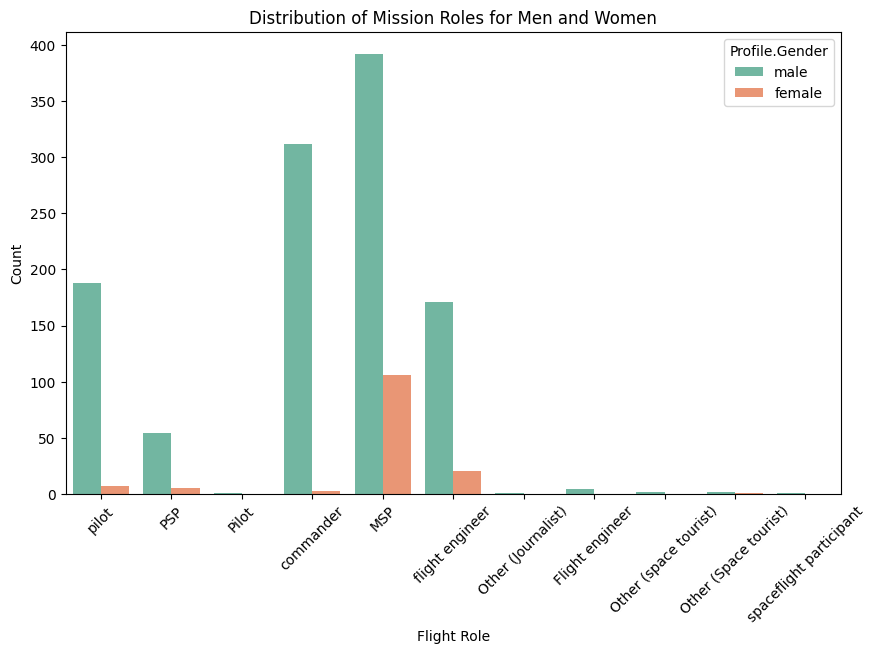

In [25]:
plt.figure(figsize = (10,6))
sns.countplot(data = astro, x = 'Mission.Role', hue = 'Profile.Gender', palette = "Set2")
plt.title("Distribution of Mission Roles for Men and Women")
plt.xlabel("Flight Role")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

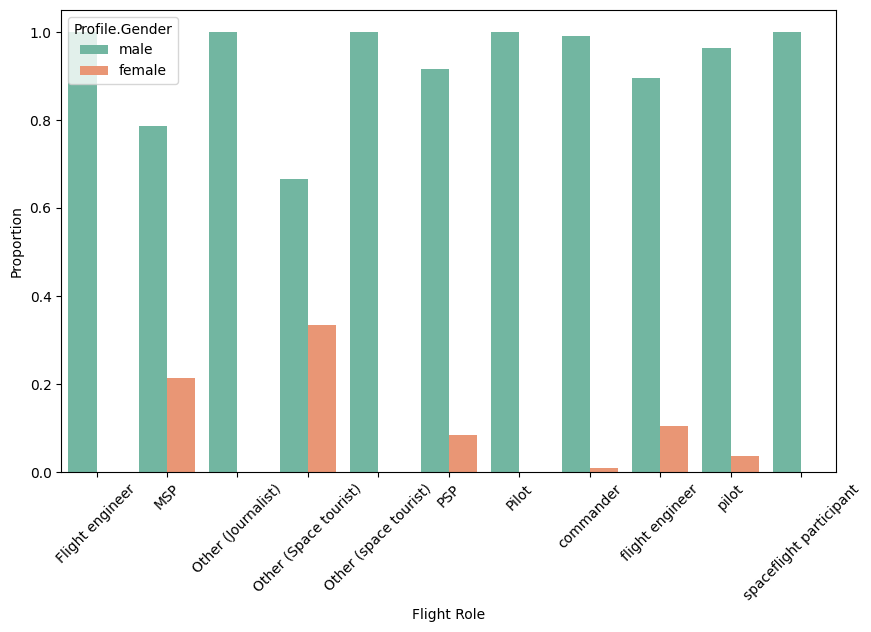

In [26]:
proportions = (astro.groupby(["Mission.Role", "Profile.Gender"]).size().reset_index(name = "Count"))
proportions["Proportion"] = proportions.groupby("Mission.Role")["Count"].transform(lambda x : x / x.sum())
plt.figure(figsize = (10, 6))
sns.barplot(data = proportions , x = "Mission.Role", y = "Proportion", hue = "Profile.Gender", palette = "Set2")
plt.xlabel("Flight Role")
plt.ylabel("Proportion")
plt.xticks(rotation = 45)
plt.legend(title = "Profile.Gender")
plt.show()

country = data['Country'].value_counts()
print(country)

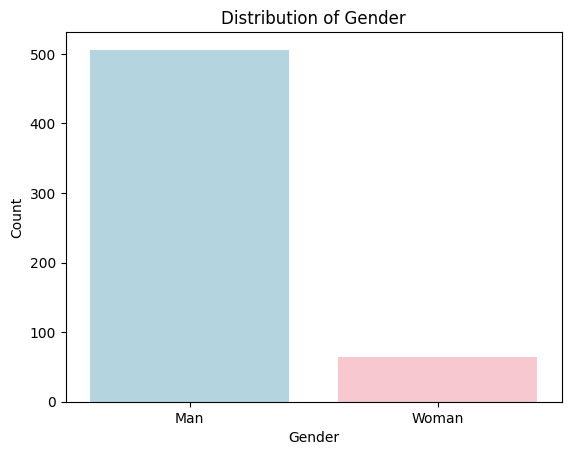

In [28]:
sns.countplot(x = 'Gender', data = data, hue = "Gender", palette = {"Man" : "lightblue", "Woman" : "pink"})
plt.title("Distribution of Gender")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()